Coding project - Watermark
==========================

For this project it is requested to write a code to automatically add a watermark to a photograph.

Below is the code written to meet the requirements after an explanation of the implementation.

Implementation
---------------

To facilitate the explanations, let's call in the following the image on which the watermark is added, "basic image".

To add the white pixels of the watermark to the basic image, we have created a function called addWatermark. 
This function has 5 parameters that we will detailed here :
- image is the basic image.
- watermark is the image of the watermark.
- posy and posx represent the position (y, x) on the basic image at which the user decides to place the watermark. This position actually designates the point from which the watermark will be drawn on the base image. The watermark will therefore have its upper left corner at the position (posy, posx).
- transparency allows the user to choose the opacity of the watermark. The larger this term is, the more opaque the watermark will be and therefore at least the basic image underneath will be seen.

To actually add the white pixels of the watermark to the basic image, we will proceed as follows:
- Go through the watermark pixel by pixel (done using the two nested for loops, one for each direction).
- Each time a white pixel is encountered (done by seeing if the pixel value is 255) : the transparency value is added to the three channels (R,G,B) of the corresponding pixel in the basic image (done in the "if" part, the "else" part is in fact a special case which will be explained later). The correspondence is established so that if we are observing the pixel at the position (10,10) of the watermark image, the pixel at the position (posY + 10, posX + 10) of the basic image will be modified. In this way, the watermark will be reconstructed on the basic image.

All that remains now is to explain why a condition is added for each channel on the new value of the pixel (image [posy+y, posx+x, i] + transparency). This is done to avoid an overflow. Indeed, if the value of the pixel on the basic image (for the channel in question) is such that once the transparency is added, this value exceeds 255, we encounter an overflow which will lead to unwanted colours. The solution implemented here is to put a cap of 255 on any pixel value on the watermark and thus directly assign the value 255 to any pixel for which the sum of its initial value and the transparency leads to an overflow.

This function returns the image given in parameter where the watermark has been added at the desired position and with the requested transparency.

The image with the added watermark (im) is created by calling this function and is then saved as "imageWithWatermark.jpg".
It is displayed in the notebook using the matplotlib library.

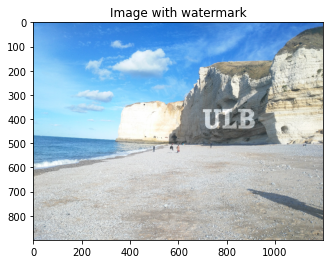

In [6]:
from skimage.io import imread,imsave,imshow
import matplotlib.pyplot as plt
%matplotlib inline

etretat = imread('etretat.jpg')
watermark = imread('watermark.png')

def addWatermark(image, watermark, posy, posx, transparency):
    for y in range (watermark.shape[0]):
        for x in range (watermark.shape[1]):
            if watermark[y,x] == 255:
                for i in range (3):
                    if (image[posy+y,posx+x,i] + transparency) < 255:
                        image[posy+y,posx+x,i] += transparency
                    else:   
                        image[posy+y,posx+x,i] = 255
    return image
                
im = addWatermark(etretat, watermark, 358, 700, 100)
imsave('imageWithWatermark.jpg',im)
        
plt.figure()
plt.title('Image with watermark')
plt.imshow(im)
plt.show()